# OCR(Optical Character Recognition)
* This OCR app will be used to extract text from an image of handwritten notes.
* Take image (Hnadwritten notes)--> Process the image(Computer Vison)-->LLM(Role assigned as OCR)

| File Type   | Extension        | MIME Type                                                                 |
| ----------- | ---------------- | ------------------------------------------------------------------------- |
| Plain text  | `.txt`           | `text/plain`                                                              |
| HTML        | `.html`          | `text/html`                                                               |
| CSV         | `.csv`           | `text/csv`                                                                |
| JSON        | `.json`          | `application/json`                                                        |
| PDF         | `.pdf`           | `application/pdf`                                                         |
| ZIP         | `.zip`           | `application/zip`                                                         |
| JPEG image  | `.jpg` / `.jpeg` | `image/jpeg`                                                              |
| PNG image   | `.png`           | `image/png`                                                               |
| GIF         | `.gif`           | `image/gif`                                                               |
| MP3 audio   | `.mp3`           | `audio/mpeg`                                                              |
| MP4 video   | `.mp4`           | `video/mp4`                                                               |
| Excel       | `.xls`           | `application/vnd.ms-excel`                                                |
| Excel (new) | `.xlsx`          | `application/vnd.openxmlformats-officedocument.spreadsheetml.sheet`       |
| Word        | `.doc`           | `application/msword`                                                      |
| Word (new)  | `.docx`          | `application/vnd.openxmlformats-officedocument.wordprocessingml.document` |

In [45]:
# pip install opencv-python

In [46]:
import cv2
import matplotlib.pyplot as plt
import google.generativeai as genai
import os
from PIL import Image

In [65]:
image=cv2.imread('IMG_3766.jpg') # Right now its a BGR image (need to convert into RGB)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)  #BGR-->RGB
image_gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)  #RGB-->GRAY
_,image_bw=cv2.threshold(image_gray,150,255,cv2.THRESH_BINARY)

In [57]:
image_gray

array([[  1,   1,   1, ..., 223, 222, 223],
       [  1,   1,   1, ..., 223, 222, 223],
       [  3,   3,   3, ..., 223, 223, 223],
       ...,
       [ 55,  56,  58, ..., 183, 180, 181],
       [ 56,  57,  59, ..., 173, 168, 177],
       [ 57,  58,  60, ..., 177, 177, 201]], dtype=uint8)

In [58]:
# Its a color Image (3D)
image_bw.shape

(5712, 4284)

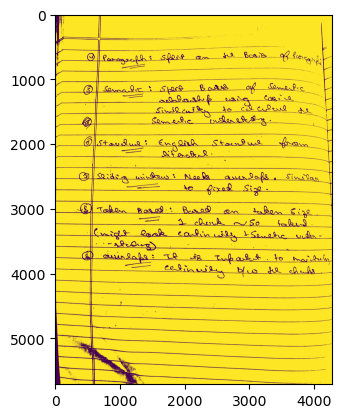

In [59]:
plt.imshow(image_bw)
plt.show()

In [60]:
cv2.imshow('Grey Image',image_gray)
cv2.imshow('Color',image)
cv2.imshow('BW',image_bw)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [61]:
# The image in cv2 we have is in numpy format we need to convert into object 
final_image=Image.fromarray(image_bw)

In [62]:
# Configure LLM 
gemini_key=os.getenv('Google-API-Key1')
genai.configure(api_key=gemini_key)
model=genai.GenerativeModel('gemini-2.5-flash-lite',
                            generation_config={'temperature':0.5})

In [66]:
prompt='''
<Role> You are an OCR(Optical Character Recognition) application.
<Goal> Identify the characters in handwritten notes.
<Context> User has provided the image of handwritten notes.
<Instruction>
* Do not generate any new content.
* Make sure that all the words are from english vocabulary.
* You can complete a word which is not recognised.
* Output should be well formated.
'''

In [67]:
response=model.generate_content([prompt,final_image])
print(response.text)


(4) Paragraph: space on the Basis of Paragraph
(5) Semantic: space Based of semantic
relationship using cosine
similarity to calculate the
semantic ordering.
(6) Standard: English Standard from
lifectal.
(7) Sliding window: Needs overlaps. Similar
to fixed Size.
(8) Token Based: Based on token Size.
I check ~50 token.
(might look carlin wily + Semantic order -
- strong)
(9) overlap: If is input to maintain
certainty between the checks.


# Extracting text from Word

In [70]:
pip install python-docx


In [71]:
from docx import Document

In [74]:
file=Document('E:\GenAI Week 3\MoMGenerator\MG Resume.docx')

In [77]:
doc_text=''
for p in file.paragraphs:
    doc_text=doc_text+p.text+'\n'
print(doc_text)

  Data-driven Commerce graduate with a strong foundation in accounting and finance. Possesses robust analytical expertise 
  and  hands-on experience in data analysis, visualization, and solving complex business problems. Skilled in project  
  management and strategic planning, with a proven ability to translate data into actionable insights for improved 
  operational  performance and decision-making.
Programming Languages: Python
Core Libraries: Pandas, NumPy, Scikit-learn, SciPy, Matplotlib, Seaborn
Databases: SQL
Business Intelligence & Visualization: Tableau, Power BI, Excel
Key Methodologies: Exploratory Data Analysis (EDA), Statistical Modeling, Supervised Machine Learning, Unsupervised Machine Learning, Natural Language Processing (NLP)
Emerging Technologies: Generative AI, Large Language Models (LLMs)
Operational Practices: MLOps

  Hospitality Analytics: Booking Cancellation Prediction System
   https://github.com/goyalmanya16-crypto/Hotel-Cancellation-Case-Study
Developed a